# Spectral Clustering - Social Network

In this problem, you will use spectral clustering techniques to infer friend communities from real-world social network data.

The file `adjacency.txt` contains the adjacency matrix of a graph taken from
a social network. This graph has $n$ = 328 vertices, each corresponding a user. An edge between
user $i$ and user $j$ means that $i$ and $j$ are friends in the social network.

In lecture we focused on the graph Laplacian $L = D − A$, where $A$ is the
adjacency matrix and $D$ is the degree matrix. However, rather than using $L$, here you should use the normalized Laplacian matrix

$$L_{norm} = D^{−1/2}LD^{−1/2} = Idn − D^{−1/2}AD^{−1/2}$$

In brief, the reason is that for graphs which have very heterogeneous degrees (e.g., if some people
have many friends whereas others have very few friends), then spectral clustering using $L$ often
leads to poor results due to biasing based on a vertex’s degree, whereas the normalized Laplacian
$L_{norm}$ automatically corrects for this.


In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Reads the adjacency matrix from file
A = np.loadtxt('adjacency.txt')
print(f'There are {A.shape[0]} nodes in the graph.')

There are 328 nodes in the graph.


As you can see above, the adjacency matrix is relatively large (328x328): there are 328 persons in the graph. In order to visualize this adjacency matrix, it is convenient to use the 'imshow' function. This plots the 328x328 image where the pixel (i,j) is black if and only if A[i,j]=1.

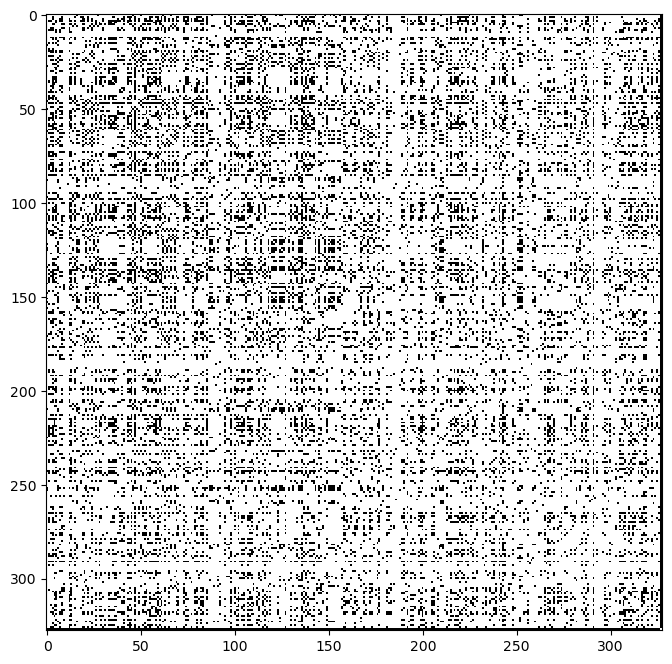

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(A,aspect='equal',cmap='Greys',  interpolation='none');

**(a)** Construct in the cell below the degree matrix:
$$
D_{i,i} = {\rm deg}(i) \qquad \text{and} \qquad D_{i,j} = 0 \ \ \text{if} \ i \neq j,
$$
the Laplacian matrix:
$$
L = D - A
$$
and the normalized Laplacian matrix:
$$
L_{\rm norm} = D^{-1/2} L D^{-1/2}.
$$

In [4]:
A

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [5]:
# Your answer here
D = np.diag(A.sum(axis = 0))
L = D - A
L

array([[ 27.,   0.,   0., ...,   0.,   0.,  -1.],
       [  0.,  83.,   0., ...,   0.,   0.,  -1.],
       [  0.,   0.,  65., ...,   0.,  -1.,  -1.],
       ...,
       [  0.,   0.,   0., ...,  66.,   0.,  -1.],
       [  0.,   0.,  -1., ...,   0.,  58.,  -1.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1., 327.]])

In [6]:
D_norm = np.diag(A.sum(axis = 0)**(-1/2))
L_norm = D_norm @ L @ D_norm
L_norm

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.01064251],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.00606998],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.01628656, -0.00685914],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.00680698],
       [ 0.        ,  0.        , -0.01628656, ...,  0.        ,
         1.        , -0.00726126],
       [-0.01064251, -0.00606998, -0.00685914, ..., -0.00680698,
        -0.00726126,  1.        ]])

**(b)** Using the command 'linalg.eigh' from numpy, compute the eigenvalues and the eigenvectors of $L_{\rm norm}$.

In [7]:
# Your answer here
w, v = np.linalg.eigh(L_norm)

**(c)** We would like to cluster the nodes (i.e. the users) in 3 groups. Using the eigenvectors of $L_{\rm norm}$, assign to each node a point in $\mathbb{R}^2$, exactly as explained in last lecture (also in 'Algorithm 1' of the notes) where you replace $L$ by $L_{\rm norm}$. Plot these points using the 'scatter' function of matplotlib.

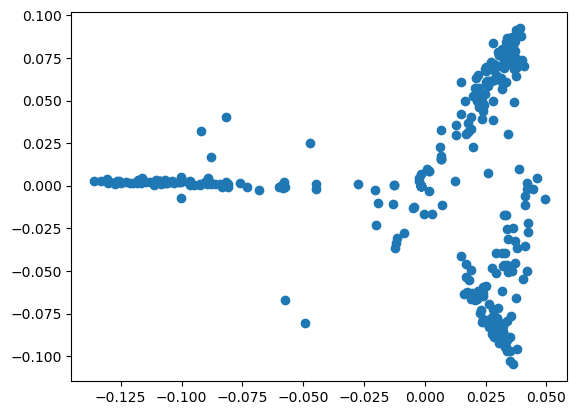

In [8]:
# Your answer here
coord = v[:,1:3]
plt.scatter(coord[:,0], coord[:,1]);

**(d)** Using the K-means algorithm (use the built-in function from scikit-learn), cluster the embeddings in $\mathbb{R}^2$ of the nodes in 3 groups.

C:\Users\liuq34\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


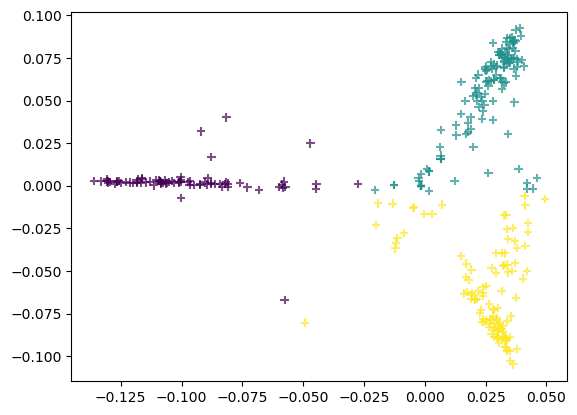

In [9]:
# Replace ??? by the matrix of the points computed in (c)
# Each row corresponds to a data point
kmeans = KMeans(n_clusters=3, random_state=0).fit(coord)
labels = kmeans.labels_
# labels contains the membership of each node 0,1 or 2

# This colors each point of R^2 according to its label
# replace "x/y coordinates" by the coordinates you computed in (c) 
plt.scatter( coord[:,0], coord[:,1], alpha=0.7, marker='+', c = labels);

**(e)** Re-order the adjacency matrix according to the clusters computed in the previous question. That is, reorder the columns and rows of $A$ to obtain a new adjacency matrix (that represents of course the same graph) such that the $n_1$ nodes of the first cluster correspond to the first $n_1$ rows/columns, the $n_2$ nodes of the second cluster correspond to the next $n_2$ rows/columns, and the $n_3$ nodes of the third cluster correspond to the last $n_3$ rows/columns.
Plot the reordered adjacency matrix using 'imshow'.

In [10]:
## Your answer here
sorting = np.argsort(labels)
A_1 = A[sorting, :]
A_2 = A_1[:,sorting]

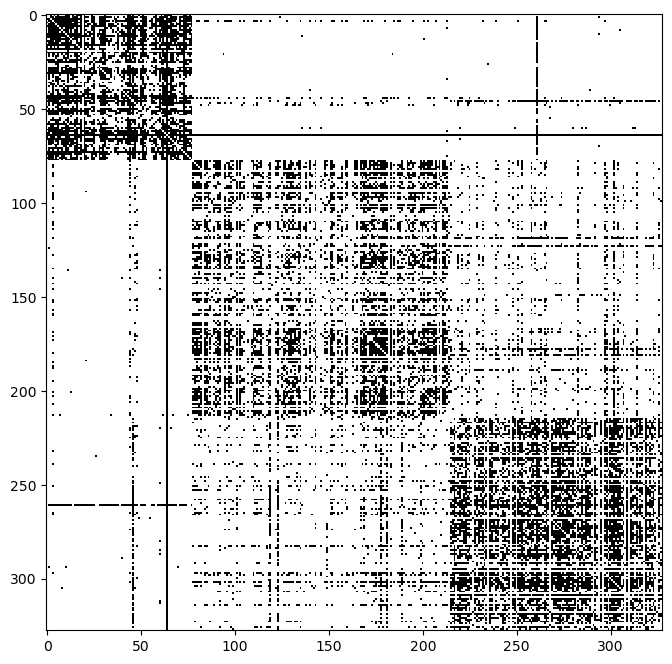

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(A_2,aspect='equal',cmap='Greys',  interpolation='none');

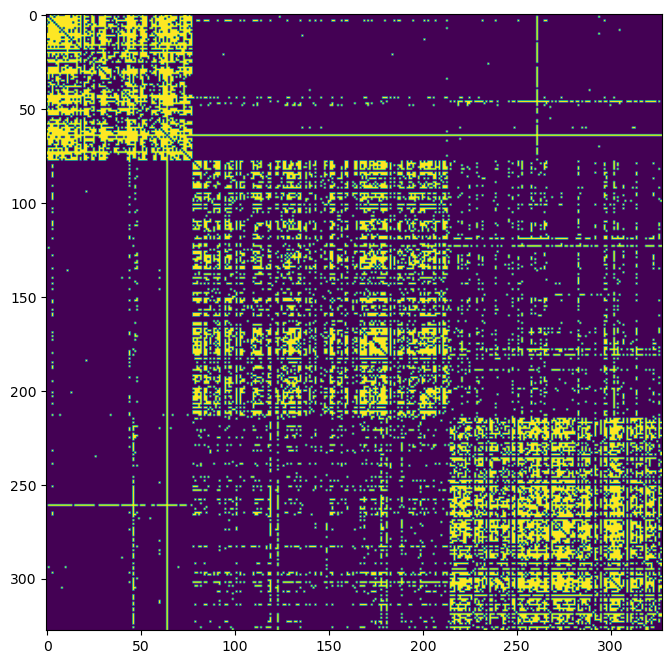

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(A_2);